#  Bicycle Journeys: Exploratory Data Analysis
<hr>



## 1. Introduction
In this task we aim to find insights into the data set given as (`metro.csv`) related to a Bicycle Renting Project by exploratory data analysis.

## 2. Data Collection

In [1]:
# import all required packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn import preprocessing
import os
import glob
import warnings
%matplotlib inline

In [2]:
#Reading data from local directory
data=pd.read_csv('metro.csv',low_memory=False)
data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,124657107,5,7/1/2019 0:04,7/1/2019 0:09,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard
1,124657587,9,7/1/2019 0:07,7/1/2019 0:16,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric
2,124658068,5,7/1/2019 0:20,7/1/2019 0:25,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric
3,124659747,20,7/1/2019 0:44,7/1/2019 1:04,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard
4,124660227,27,7/1/2019 0:44,7/1/2019 1:11,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard


## 3. Data Understanding

In [3]:
#checking for general information and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92124 entries, 0 to 92123
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              92124 non-null  int64  
 1   duration             92124 non-null  int64  
 2   start_time           92124 non-null  object 
 3   end_time             92124 non-null  object 
 4   start_station        92124 non-null  int64  
 5   start_lat            89985 non-null  float64
 6   start_lon            89985 non-null  float64
 7   end_station          92124 non-null  int64  
 8   end_lat              88052 non-null  float64
 9   end_lon              88052 non-null  float64
 10  bike_id              92124 non-null  object 
 11  plan_duration        92124 non-null  int64  
 12  trip_route_category  92124 non-null  object 
 13  passholder_type      92124 non-null  object 
 14  bike_type            92124 non-null  object 
dtypes: float64(4), int64(5), object(6)
m

Obviously there are some missing values and also some dtypes are misinterpreted.<br>
The Data set contains 92124 entries and 15 attributes with the following discription:
- trip_id: Locally unique integer that identifies the trip
- duration: Length of trip in minutes
- start_time: The date/time when the trip began, presented in ISO 8601 format in local time
- end_time: The date/time when the trip ended, presented in ISO 8601 format in local time
- start_station: The station ID where the trip originated (for station name and more information on each station see the Station Table)
- start_lat: The latitude of the station where the trip originated
- start_lon: The longitude of the station where the trip originated
- end_station: The station ID where the trip terminated (for station name and more information on each station see the Station Table)
- end_lat: The latitude of the station where the trip terminated
- end_lon: The longitude of the station where the trip terminated
- bike_id: Locally unique integer that identifies the bike
- plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)
- trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips
- passholder_type: The name of the passholder's plan
- bike_type: The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes.
\

In [4]:
#Checking for duplicated rows
print(f'The number of duplicated rows in this data set is {data.duplicated().sum()}')

The number of duplicated rows in this data set is 0


## 4. Data Preprocessing
In this section we aim to handle dtype misinterpretions, missing values and outliers by identification and explanation of the cause.

In [5]:
#Fixing data types
#Converting date columns to pandas datetime format
data[['start_time','end_time']]=data[['start_time','end_time']].apply(pd.to_datetime)

#Fixing category columns
data[['trip_route_category','passholder_type','bike_type']]=data[['trip_route_category','passholder_type','bike_type']].astype('category')

### Handling Missing values

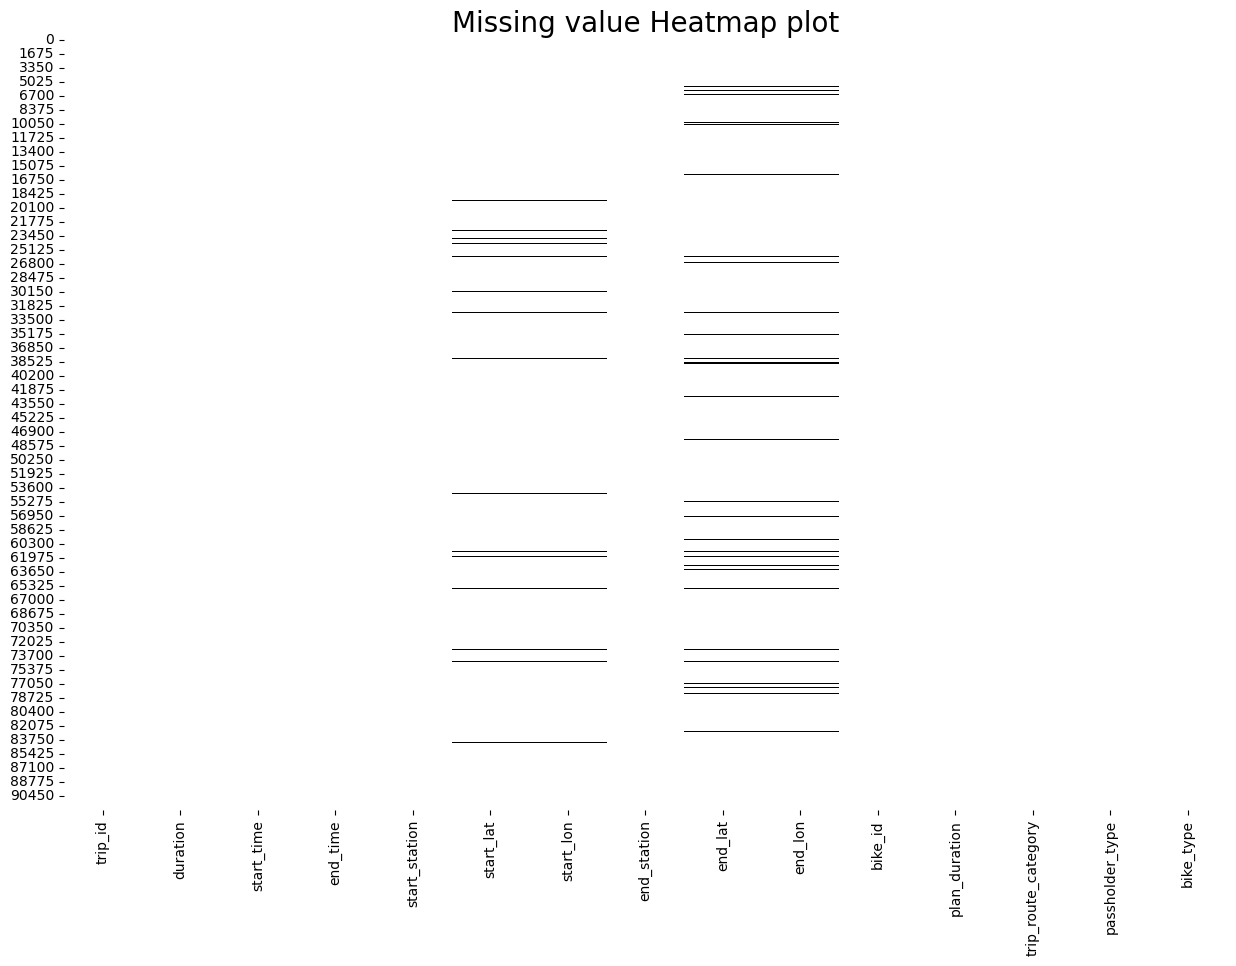

In [6]:
#Visualising missing values
plt.figure(figsize=(15,10))
sns.heatmap(data.isnull(),cbar=False,cmap='Greys')
plt.title('Missing value Heatmap plot',fontsize=20);

It is important to investigate the missing values and find the best way to handle them. It may include removing or replacing with values like mean, median, interpolation, extrapolation,etc.

In [7]:
#Checking for missing values
total = data.isnull().sum().sort_values(ascending=False)

# Convert totals to percentage
percent = round(total / len(data) * 100, 2)

# finding common missing values
comm_mis_number=data[data.start_lat.isnull() & data.end_lat.isnull()].shape[0]
uniq_mis=total.apply(lambda row: row - comm_mis_number if row>0 else row)
# Concatenate these two Series objects and display the result
pd.concat([total, percent, uniq_mis], axis=1, keys=['Total', 'Percent','Not in Common'])

,Total,Percent,Not in Common
end_lat,4072,4.42,3225
end_lon,4072,4.42,3225
start_lat,2139,2.32,1292
start_lon,2139,2.32,1292
trip_id,0,0.00,0
duration,0,0.00,0
start_time,0,0.00,0
end_time,0,0.00,0
start_station,0,0.00,0
end_station,0,0.00,0


It seems that the missing values are only in the start and end coordinations which may be as a result of failures in the bikes starting or ending at those stations. So, let's find the stations!

In [8]:
# Finding stations related to missing values
# we know that the one has missing latitude also has missing longitute
start_station_lat = data.groupby('start_station')['start_lat'].unique().apply(lambda x: x[0])
start_station_lon = data.groupby('start_station')['start_lon'].unique().apply(lambda x: x[0])
start_station_lat[start_station_lat.isnull()]

start_station
3000   NaN
4285   NaN
4286   NaN
Name: start_lat, dtype: float64

In [9]:
# Finding stations related to missing values
# we know that the one has missing latitude also has missing longitude.
end_station_lat = data.groupby('end_station')['end_lat'].unique().apply(lambda x: x[0])
end_station_lat[end_station_lat.isnull()]

end_station
3000   NaN
4285   NaN
4286   NaN
Name: end_lat, dtype: float64

So it is obvious that the coordinations in which the bike journeys originated from or ended to stations 3000, 4285 or 4286 are missing. So, since the coordinations are not something that follows a regression and interestingly there is a meaningful order in station IDs and the coordination we make use of mean value of closest station ID number. The process of how many stations participate in average operation is done one by one to ensure that a meaningful value will be imputed.

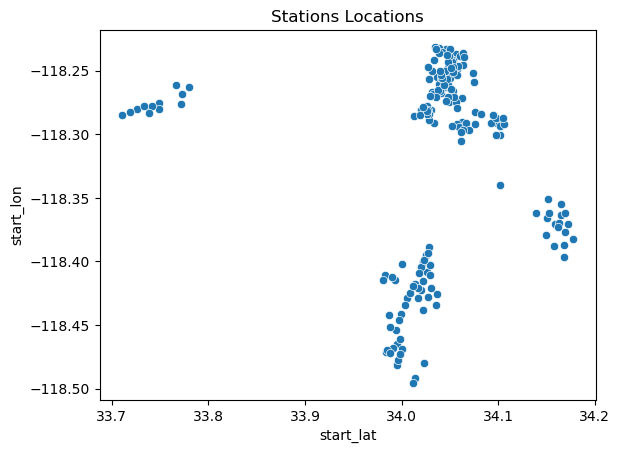

In [10]:
# Calculating the impution values
start_station_lat[3000]=start_station_lat.loc[3000:3012].mean()
start_station_lon[3000]=start_station_lon.loc[3000:3012].mean()
start_station_lat[4285]=start_station_lat.loc[4273:4285].mean()
start_station_lon[4285]=start_station_lon.loc[4273:4285].mean()
start_station_lat[4286]=start_station_lat.loc[4287:4302].mean()
start_station_lon[4286]=start_station_lon.loc[4287:4302].mean()

# Creating the table of station coordinations
station_coor=pd.concat([start_station_lat, start_station_lon], axis=1, keys=['start_lat', 'start_lon']).reset_index()
# Visualisation of stations to check that the location of imputed values makes sense
sns.scatterplot(x=station_coor.start_lat,y=station_coor.start_lon)
plt.title('Stations Locations');

This graph shows that there are a 4 districts that station are located in. It may help in EDA. 

In [11]:
# Filling missing values by mapping from the calculated ones the table.
data['start_lat'] = data['start_lat'].fillna(data['start_station'].map(start_station_lat.to_dict()))
data['start_lon'] = data['start_lon'].fillna(data['start_station'].map(start_station_lon.to_dict()))
data['end_lat'] = data['end_lat'].fillna(data['start_station'].map(start_station_lat.to_dict()))
data['end_lon'] = data['end_lon'].fillna(data['start_station'].map(start_station_lon.to_dict()))

In [12]:
# Final Check for missing values
if data.isnull().sum().sum()==0:
    print('There is no missing value in the data set any more\n')
else:
    print('There is still missing values')

There is no missing value in the data set any more



We aim using K means method to help us in clustering the stations. A visual check showed us that there are 4 potential clusters (districts) in the stations locations. Let's find them!

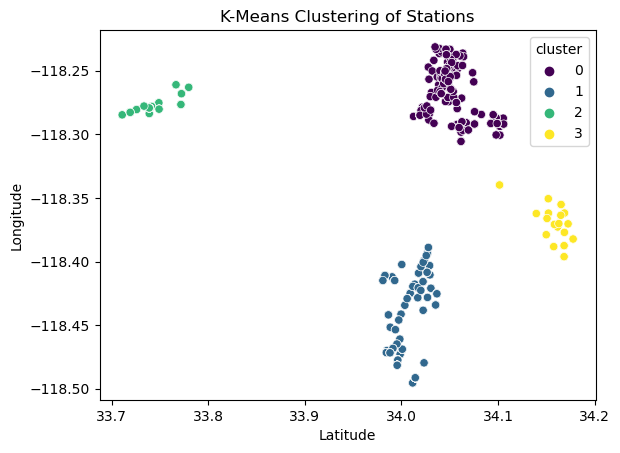

In [13]:
# Clustering the stations locations
kmeans = KMeans(n_clusters=4, random_state=42,n_init=10)
data['cluster'] = kmeans.fit_predict(data[['start_lat', 'start_lon']])

# Visualize the clusters
#plt.scatter(data['start_lat'], data['start_lon'], c=data['cluster'], cmap='viridis')
sns.scatterplot(x=data['start_lat'], y=data['start_lon'], hue=data['cluster'], palette='viridis',)
plt.title('K-Means Clustering of Stations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Checking for outliers

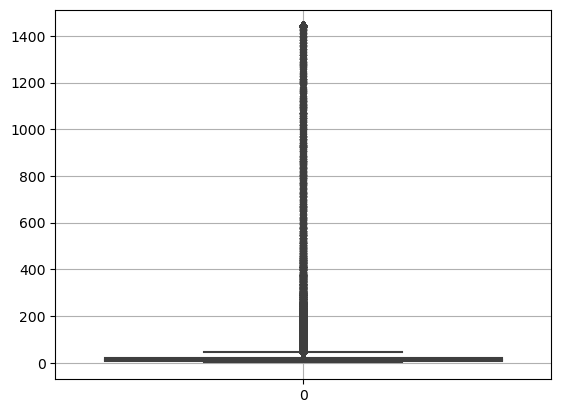

In [14]:
#plotting boxplot to find outliers
sns.boxplot(data=data.duration)
plt.grid()


Obviously, there are a significant number of outliers in the data set. Let's investigate more.

In [15]:
data.duration.describe()

count    92124.000000
mean        33.168588
std        129.057841
min          1.000000
25%          6.000000
50%         12.000000
75%         22.000000
max       1440.000000
Name: duration, dtype: float64

There is a huge distance between Quantile 75% and the max value. This means the system has failed to set the end time for some trips. Let's find out where it has happended.

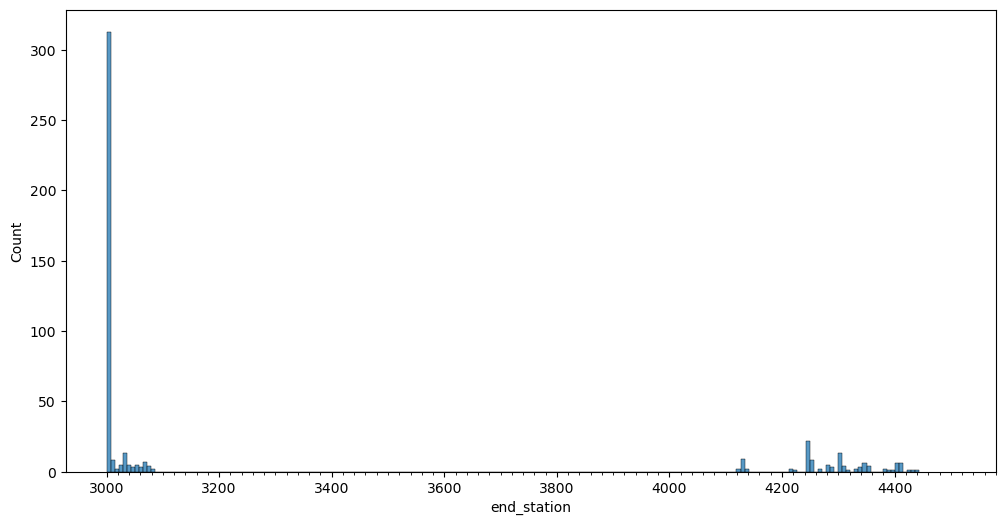

In [16]:
# Plotting histogram of stations where the duration is 24 hrs
plt.figure(figsize=(12,6))
sns.histplot(data[data.duration==1440].end_station,bins=200)
plt.xticks(np.arange(3000, 4600, step=20),minor=True);

There are some trips that is taken long unusually. We see in the column `duration` the value is limited to 1440 min which is actually 24 hr. It is possibly because the system automatically set this time as a limit and assume that the station has failed to record the trip's end time.<br>The station **3000** (again!) noticeably acounts for the majority of failures. One possible reason is that this station is very old as its ID is the first in the station IDs hence it needs a renewal!

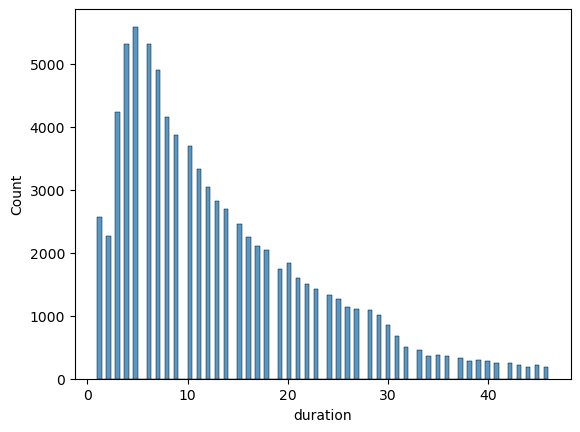

In [17]:
# Calculating quantile parameters
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
# Removing the outliers
data=data[(data['duration'] >= Q1 - 1.5 * IQR) & (data['duration'] <= Q3 + 1.5 * IQR)]
sns.histplot(data['duration'],bins=100);

After removing outliers the histogram becomes close to a normal distribution.

## 5. Exploratory Data Analysis

### 5.1 Univariate Analysis


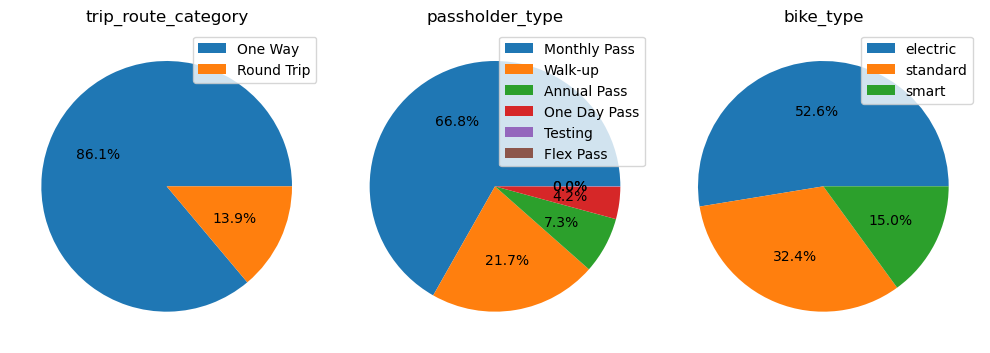

In [18]:
# Visualising categorical feature by Pie-Chart

features = ['trip_route_category','passholder_type','bike_type']
plt.figure(figsize=(10,10))

for i, feature in enumerate(features):
    plt.subplot(1,3,i+1)
    plt.pie(data[feature].value_counts(),autopct='%1.1f%%')
    plt.legend(labels=data[feature].value_counts().index,loc='upper right')
    plt.title(feature)

plt.tight_layout()
plt.show()


It can be understood from the pie charts that the majority of customers use **monthly pass** and/or **one way trip**. Additionally, just over a half of bikes are electric.

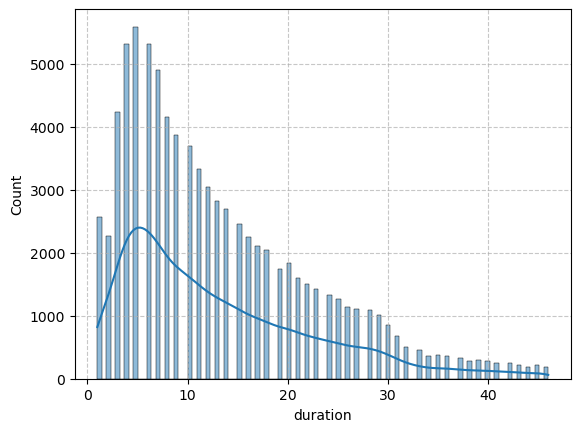

In [19]:
# Histogram and KDE plot for Duration
sns.histplot(data['duration'],bins=100,kde=True)
plt.grid(visible=True,which='both',linestyle='--', alpha=0.7);

It can be understood from the histogram and kde that most bike riders use the system for around 5 minutes. <br> Additionally, this graphs shows a special peace of information that there are two major rapid decline in the journey's duration. One is after 5 mins which represents people who use the system for probably going to work/university etc and the second one is around 30 mins which can be interpreted as a probable limit time which is included in subscription types.<br><br>
Let's investigate more. We can add a new column representing the day of the week

In [20]:
warnings.filterwarnings('ignore')
# Adding a new column representing the day of the corresponding Date
data['day_name']=data.start_time.dt.day_name()
data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,cluster,day_name
0,124657107,5,2019-07-01 00:04:00,2019-07-01 00:09:00,4312,34.066990,-118.290878,4410,34.063351,-118.296799,6168,30,One Way,Monthly Pass,standard,0,Monday
1,124657587,9,2019-07-01 00:07:00,2019-07-01 00:16:00,3066,34.063389,-118.236160,3066,34.063389,-118.236160,17584,30,Round Trip,Monthly Pass,electric,0,Monday
2,124658068,5,2019-07-01 00:20:00,2019-07-01 00:25:00,4410,34.063351,-118.296799,4312,34.066990,-118.290878,18920,30,One Way,Monthly Pass,electric,0,Monday
3,124659747,20,2019-07-01 00:44:00,2019-07-01 01:04:00,3045,34.028511,-118.256668,4275,34.012520,-118.285896,6016,1,One Way,Walk-up,standard,0,Monday
4,124660227,27,2019-07-01 00:44:00,2019-07-01 01:11:00,3035,34.048401,-118.260948,3049,34.056969,-118.253593,5867,30,One Way,Monthly Pass,standard,0,Monday


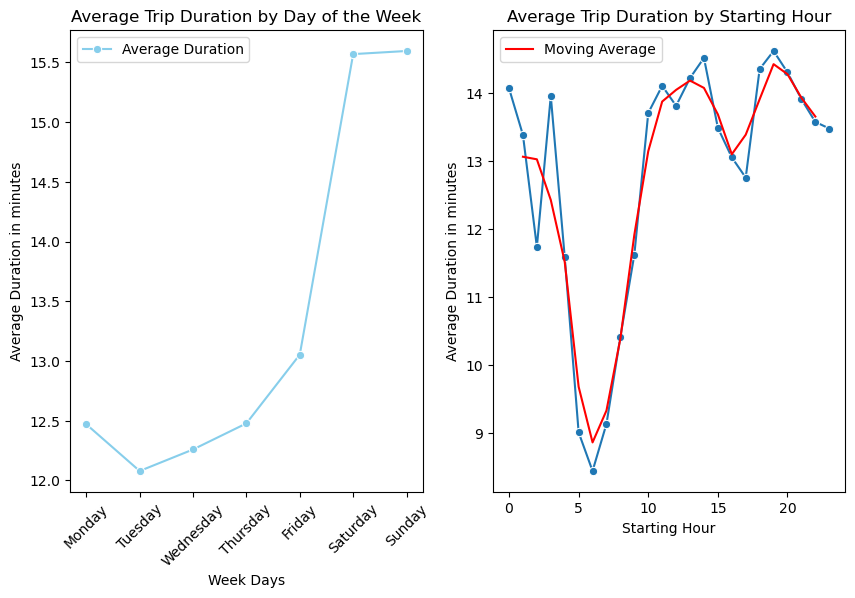

In [21]:
# Group by starting hour and calculate the average duration
hourly_duration = data.groupby(data.start_time.dt.hour)['duration'].mean().reset_index()

# Group by day_name and calculate the average duration

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.day_name = pd.Categorical(data.day_name, categories=days_order, ordered=True)


daily_duration = data.groupby('day_name')['duration'].mean().reset_index()

# Plot the first subplot results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='day_name', y='duration', data=daily_duration, marker='o', color='skyblue', label='Average Duration')

# Arranging plot's decorations

plt.title('Average Trip Duration by Day of the Week')
plt.xlabel('Week Days')
plt.xticks(rotation=45)
plt.ylabel('Average Duration in minutes')

# Plot the second subplot

plt.subplot(1, 2, 2)
hourly_duration['moving_avg'] = hourly_duration.duration.rolling(window=3, center=True).mean()
sns.lineplot(x='start_time', y='duration', data=hourly_duration, marker='o')
sns.lineplot(x='start_time', y='moving_avg', data=hourly_duration, color='red', label='Moving Average')

# Arranging plot's informations

plt.title('Average Trip Duration by Starting Hour')
plt.xlabel('Starting Hour')
plt.ylabel('Average Duration in minutes')
plt.show();

Let us depict the distribution of trip's duration in more detailed. In the following plot we aim to show the density of data as well as the exact duration values to find the highest demand and the associated duration. This will help managers to adapt their services with the market's needs. 

In [23]:
# Stacking x and y to calculate density 
stacked = np.vstack([data.start_time.dt.hour,data.duration])

# Creating estimated gaussian densities
density = gaussian_kde(stacked)(stacked)


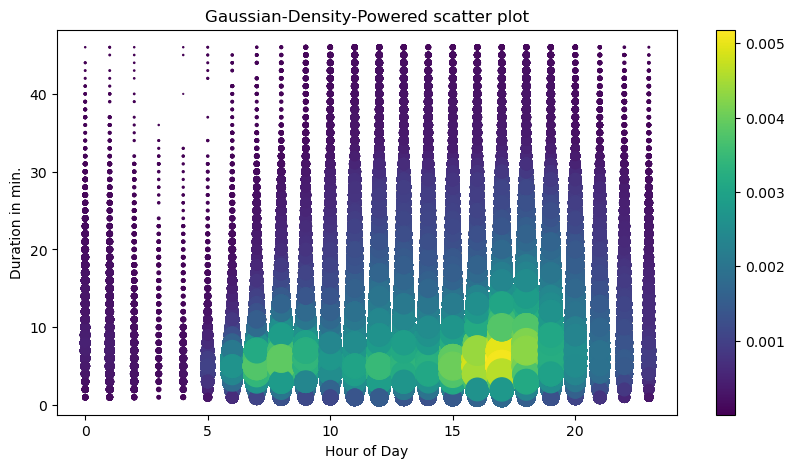

In [25]:
# Plotting duration vs hour
plt.figure(figsize=(10,5))
plt.scatter(data.start_time.dt.hour, data.duration, c=density, s=density*100000)
plt.colorbar()
plt.title('Gaussian-Density-Powered scatter plot')
plt.xlabel('Hour of Day')
plt.ylabel('Duration in min.')
plt.show()

By these graphs we understand that in the working days and peak hours i.e. 8 am and 5 pm (to some extent) the duration of trips are at its minimum while the trips at the weekends are significantly longer.<br><br>
We will also investigate more on the average trip's duration by different passholder types later in the Bivariate analysis section.

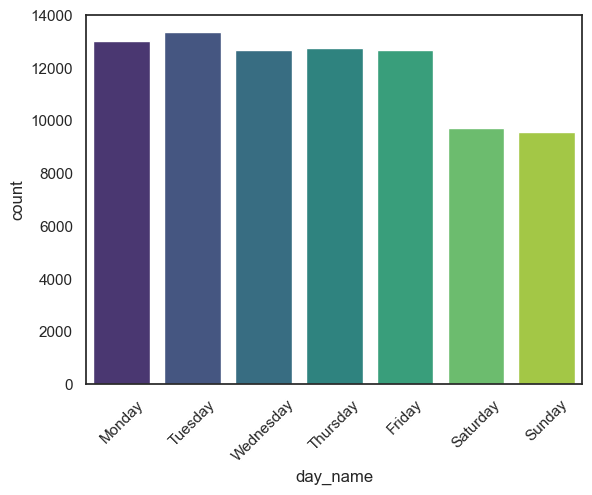

In [141]:
# Visualising occurance of trips in week days
sns.countplot(data=data,x=data['day_name'],palette='viridis')
plt.tick_params(axis='x',rotation=45)
plt.show()

This Plot shows that the demand for bike sharing is less than weekdays and this is completely normal since there are a group of people who tend to stay at home a rest at the weekends. 

Let's visualise the distribution of number of trips over the day hour to find peak and off-peak hours

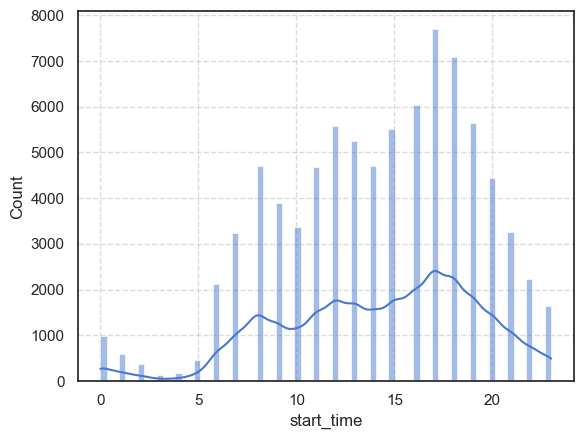

In [142]:
# Visualising the histogram of trips in the time scale of hours
sns.histplot(x=data.start_time.dt.hour,kde=True)
plt.grid(visible=True,which='both',linestyle='--', alpha=0.7)

This plot shows that the number of trips rises early in the morning to a **peak at 8 am** followed by a slightly decrease and again a peak at 12 pm, then the same pattern until the system reaches to the heaviest load at **5 pm**. <br>This trend shows the riders' behaviour in terms of the day hours. That means most peaple start going out at 8 am and they get back home at 5 pm. 

Now we can split the data into weekdays and weekends and again plot the histograms

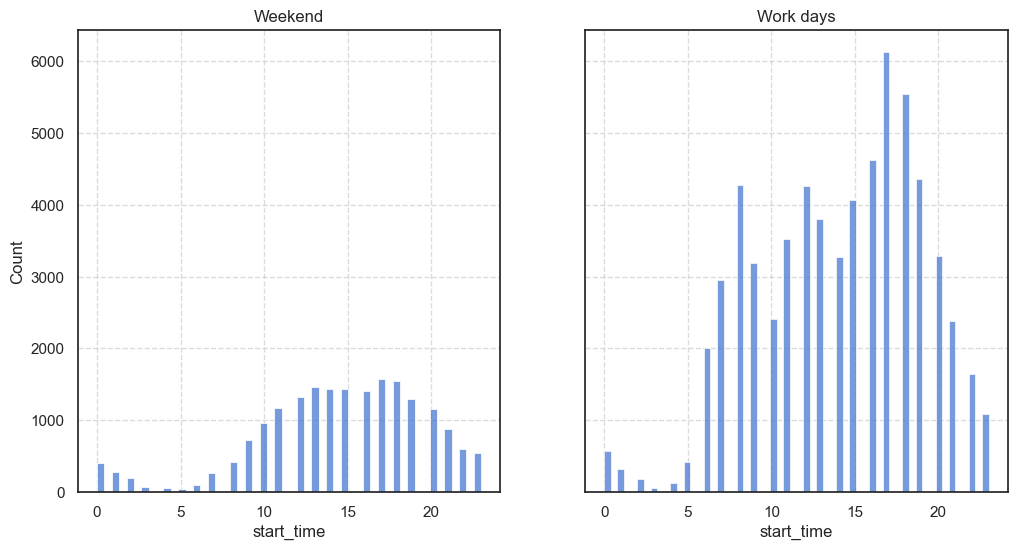

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.histplot(x=data[data.start_time.dt.dayofweek > 4].start_time.dt.hour, ax=ax[0])
ax[0].grid(visible=True,which='both',linestyle='--', alpha=0.7)
ax[0].set_title('Weekend')

# Plot the second histogram for workdays
sns.histplot(x=data[data.start_time.dt.dayofweek < 5].start_time.dt.hour, ax=ax[1])
ax[1].grid(visible=True,which='both',linestyle='--', alpha=0.7)
ax[1].set_title('Work days')

# Show the plot
plt.show()

These pair of histograms which are in a same scale show that the customers tend to sleep in at the weekends and there are a plateau between 11 am and 8 pm for weekend unlike the work days which show rapid rise in the morning and steep decline after the peak of 5 pm.

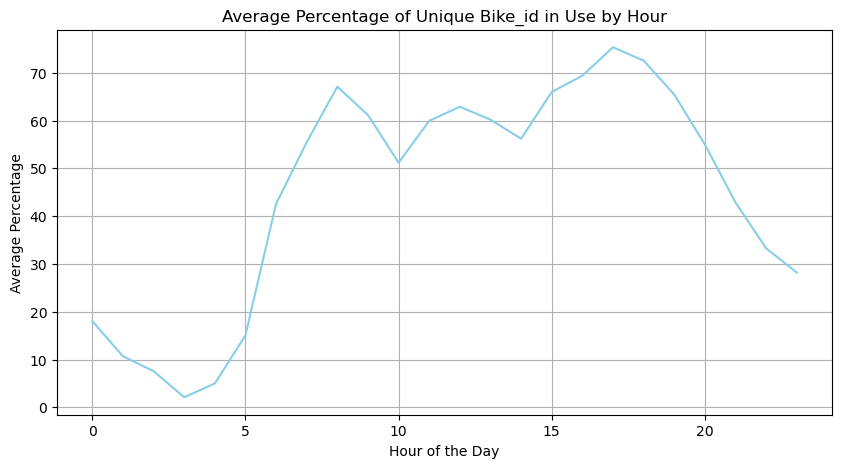

In [26]:
hourly_counts = data.groupby(data[data.start_time.dt.dayofweek <5].
                             start_time.dt.hour)['bike_id'].nunique()
total_counts = data['bike_id'].nunique()
percentage = (hourly_counts / total_counts * 100).reset_index(name='percentage')


# Create a line plot for average percentage
plt.figure(figsize=(10 ,5))
sns.lineplot(data=percentage, x='start_time', y='percentage', color='skyblue')
plt.title('Average Percentage of Unique Bike_id in Use by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Percentage')
plt.grid()
plt.show()

This analysis helps the company to keep their infrastructure updated and to be over the market demand always. In this graph it is shown that during the peak time average of 75% of total bikes are in-use on hourly basis for work days.

## 5.2 Bivariate Analysis

In this section we aim to explore data set by having 2 features at the same time on the plots.

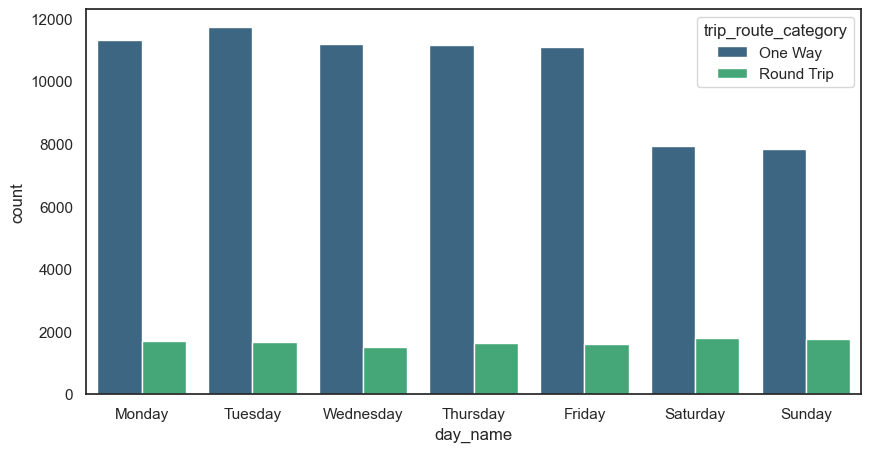

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x=data.day_name,hue='trip_route_category',palette='viridis');

According to this chart, those who go to work or university are much more likely to buy a one way trip route. This completely makes sense!. So, those who buy round trip tickets probably use bikes for fun! since system is used more on weekends

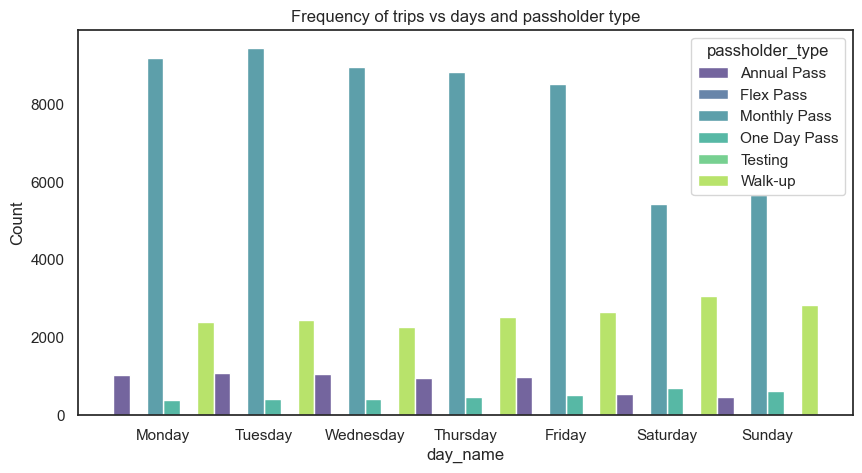

In [136]:
plt.figure(figsize=(10,5))
sns.histplot(data=data, x=data.day_name, hue='passholder_type', palette='viridis',multiple='dodge')
plt.title('Frequency of trips vs days and passholder type');

In the above figure, it is obvious that riders who hold *annual* or *monthly pass* use the system heavily on weekdays. Probably they commute to work or university. On the other hand, riders who hold *One-day* or *Walk-up* pass use the system more on weekends. As a guess, they may just have a leisurely ride and return home just for fun!

We can explore more by dividing the graph in the 4 districts.

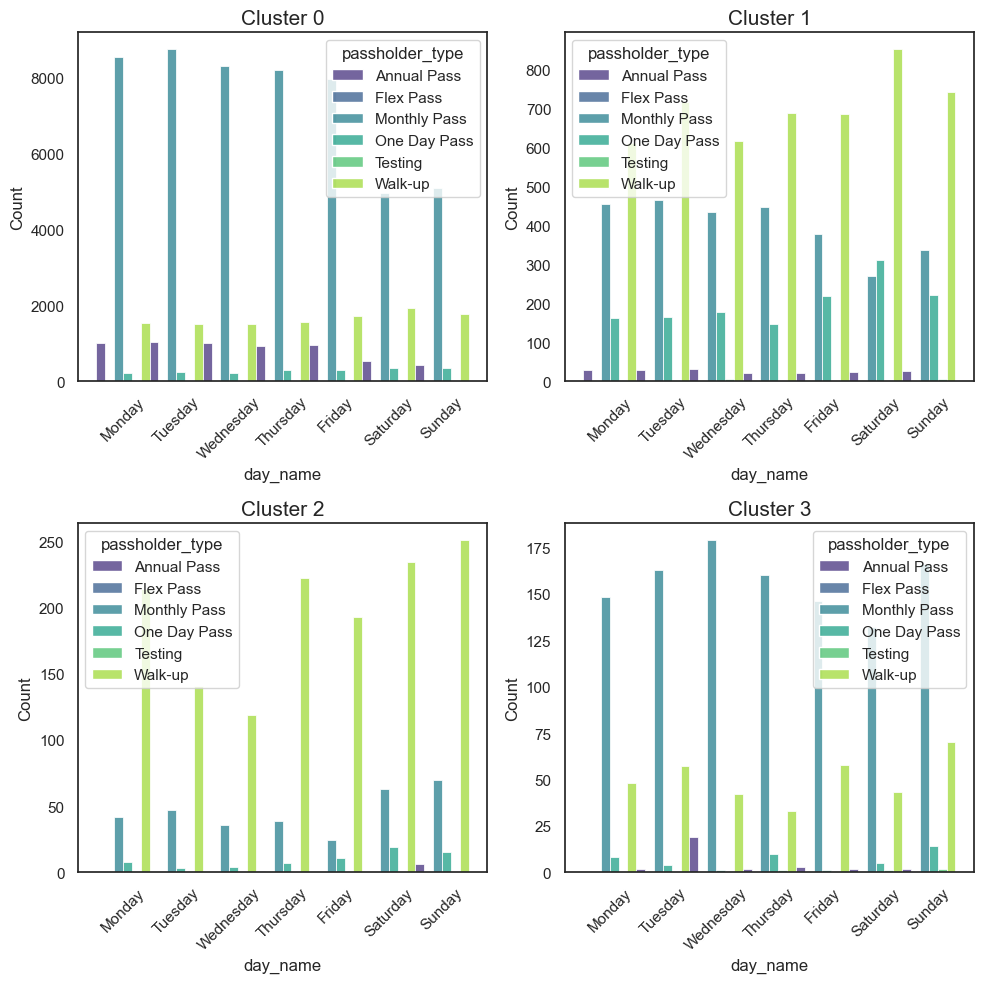

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=False)
axes = axes.flatten()

for cluster_num in range(4):
    cluster_data = data[data['cluster'] == cluster_num]
    
    # Create a histogram for the current cluster
    sns.histplot(data=cluster_data, x='day_name', hue='passholder_type', palette='viridis',
                 multiple='dodge', ax=axes[cluster_num])
    
    # Set title for each subplot
    axes[cluster_num].set_title(f'Cluster {cluster_num}',size=15)
    axes[cluster_num].tick_params(axis='x', rotation=45)

# Add a common y-axis label

axes[0].set_ylabel('Count')

plt.tight_layout()
# Show the plot
plt.show()

Apparently, threre are meaningfull difference between the urban atmosphere in these regions. It means that: 
- Cluster 0: the majority of customers are those who go to work or university since there is less demand for weekends. Maybe it is the downtown.
- Cluster 1: consists of those who use the bike sharing scheme for fun and for work/university but it is more for the fun-riders since there is more demand at the weekends.
- Cluster 2: is mostly dedicated to leisure seekers. Maybe it is near a park or residential area.
- Cluster 4: has a demand from both professional and fun users but more from professional ones.

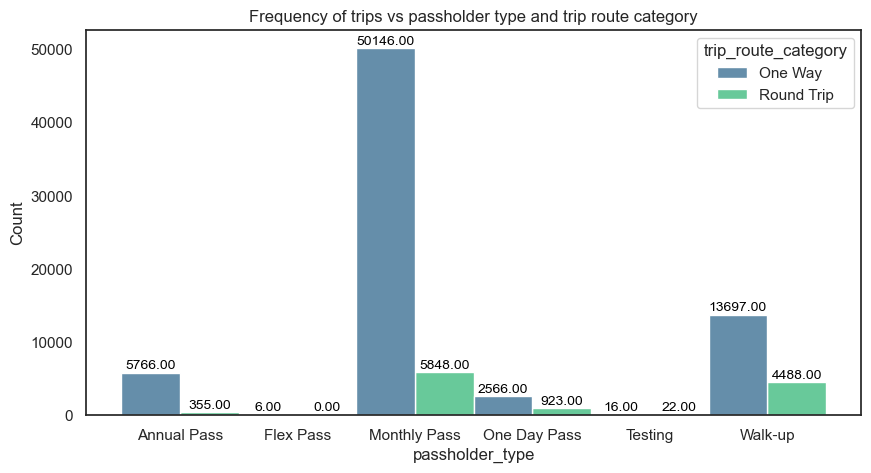

In [151]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data, x=data.passholder_type, hue='trip_route_category', palette='viridis',
             multiple='dodge')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Frequency of trips vs passholder type and trip route category');

Almost all customers use the scheme for *one way* trips. This is even more significant for annual and monthly pass holders who are considered as loyal customers.

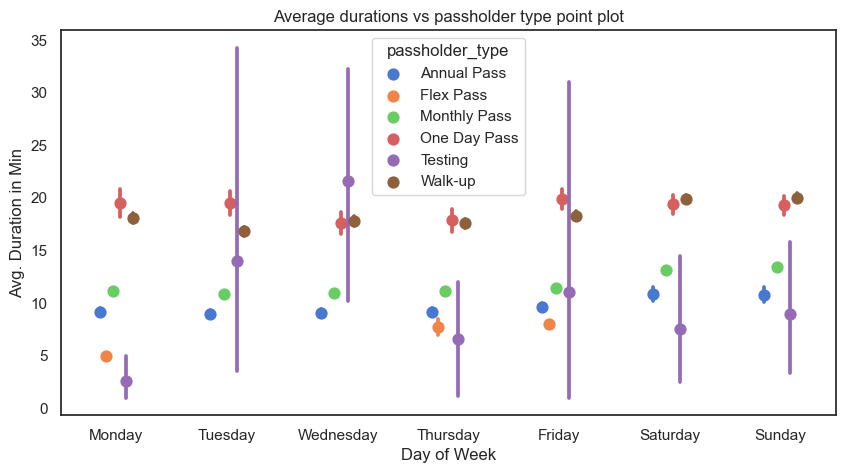

In [147]:
plt.figure(figsize=[10, 5])

# Creating a point plot
sns.pointplot(data=data, x='day_name', y='duration', hue='passholder_type', dodge=0.3, linestyles="")

# Set axis labels
plt.xlabel('Day of Week')
plt.ylabel('Avg. Duration in Min')

# Set the title
plt.title('Average durations vs passholder type point plot')

# Show the plot
plt.show()


The point plot says there are a huge confidence area in **Testing** passholder. Additionally, the **annual and flex** pass holders acount for the minimum average durations.<br>We can also do some statistical analysis on this.

,passholder_type,count,mean,std,min,25%,50%,75%,max
0,Annual Pass,6121.0,9.440124,6.765738,1.0,4.0,8.0,13.00,46.0
1,Flex Pass,6.0,7.333333,1.366260,5.0,7.0,7.5,8.00,9.0
2,Monthly Pass,55994.0,11.522538,8.195184,1.0,5.0,9.0,16.00,46.0
3,One Day Pass,3489.0,19.064775,11.773271,1.0,10.0,18.0,27.00,46.0
4,Testing,38.0,10.052632,12.496372,1.0,1.0,4.0,14.75,44.0
5,Walk-up,18185.0,18.432059,11.377923,1.0,9.0,16.0,27.00,46.0


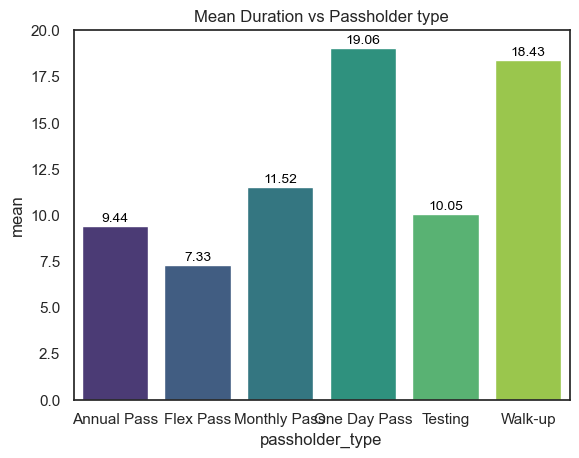

In [140]:
mean_duration_passholder=data.groupby('passholder_type')['duration'].describe().reset_index()

ax=sns.barplot(data=mean_duration_passholder, x='passholder_type',y='mean', palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Mean Duration vs Passholder type')

# Printing The statistical analysis table
mean_duration_passholder

This analysis means the customers using **One Day Pass** and **Walk-up** passholder type ride longer. This behaviour is common among people. That means the customers who buy a one day pass which is probably more expensive than an **annual** or **monthly** plan try to take advantages of that to make their expense for a good cause!

Now we aim to explore the bike types and its relation to the other features

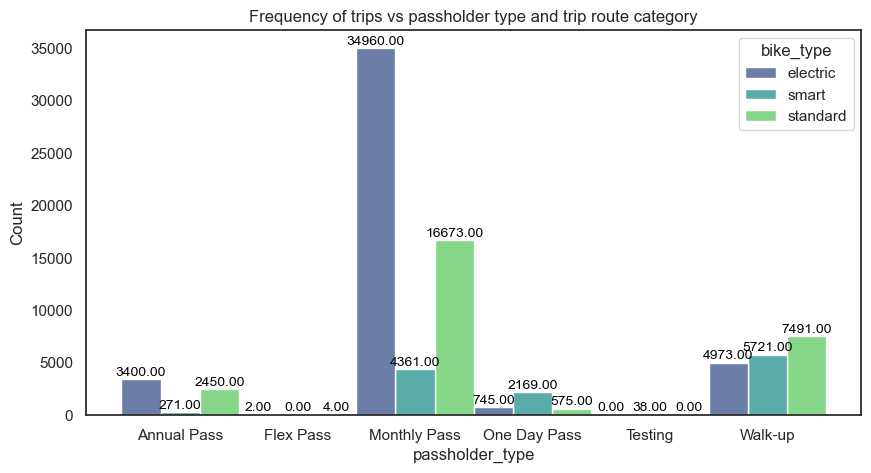

In [150]:
plt.figure(figsize=(10,5))
ax=sns.histplot(data=data, x=data.passholder_type, hue='bike_type', palette='viridis',
             multiple='dodge')
# Adding annotations on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Frequency of trips vs passholder type and trip route category');

Interesting! The subscribers with annual and monthly pass tend to use electric bikes more. Probably it is because this kind of bikes go faster and they need to go to work as fast as possible. That is why these customers' average trip duration is relatively lower than one day and walk up pass holders.<br>Additionally, those who hold Testing pass as well as One day pass tend to use smart bikes and this behaviour proves that these customers use the system for having fun.

## 6. Conclusion
- In data preprocessing we detected missing values and outliers and mis data types. We imputed the missing values which beloged to 3 specific stations coordinations with neiborhood stations. We also removed the outliers as well as got insights from that i.e. the station 3000 needs urgent maintanence services.
- Generally, we detected a group of loyal customers who hold Annual and monthly pass and have similiar attitude toward the bike sharing system. For example, they don't use fancy bikes (smart type) and the electric bikes are their favorite.
- The system is heavily in use in the morning at 8 am mostly by loyal customers. They probably go to work or university etc using a one-way ticket. On the other hand, riders who hold *One-day* or *Walk-up* pass use the system more on weekends. As a guess, they may just have a leisurely ride and return home (round trip) just for fun! 
- The peak of the bike usage occurs at 5 pm when the majority of customers get back home on working days. At this peak point 75% of bikes are in-use. Although this seems acceptable since it is an average value and the bikes need maintenance there should be enough spares to handle the heavy load of traffic at this peak point. However, at the weekend there are no such peakpoints and the system sees a steady flow of demand between 11 am and 8 pm.
- Average duration of trips are higher at the weekend and during a day it is at its minimum in the morning.
- There are 4 district area where the stations are located in and by clustering techniques we discovered some different atmosphere in these areas:
    - Cluster 0: the majority of customers are those who go to work or university since there is less demand for weekends. Maybe it is the downtown.
    - Cluster 1: consists of those who use the bike sharing scheme for fun and for work/university but it is more for the fun-riders since there is more demand at the weekends.
    - Cluster 2: is mostly dedicated to leisure seekers. Maybe it is near a park or residential area.
    - Cluster 4: has a demand from both professional and fun users but more from professional ones.
- customers using *One Day Pass* and *Walk-up* passholder type ride longer. This means these customers who probably spended more per trip rather than an *annual* or *monthly* plan try to take advantages of that to make their expense for a good cause!

# 7. References
- https://bikesharing.metro.net/about/data
- Rennie, N., Cleophas, C., Sykulski, A. M., & Dost, F. (2022). Analysing and visualising bike sharing demand with outliers. arXiv preprint arXiv:2204.06112.

- Created by: https://github.com/Amin-Nouri
- Revisions:\
0: 18.02.2024